/Users/zara/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


GaussianAnomalyDetector(features=['V12', 'V18'], epsilons=[1e-15, 1e-10, 1e-05, 0.001, 0.01, 0.1], trained=False)
GaussianAnomalyDetector(features=['V12', 'V18'], epsilons=[1e-15, 1e-10, 1e-05, 0.001, 0.01, 0.1], trained=True)
Best F1 score: 0.6084
Best log-epsilon: -23.0259
Predicted anomalies: 297
   LogProbability
0       -1.811001
1       -2.236829
2       -1.603061
3       -4.433596
4       -1.746535
GaussianAnomalyDetector(features=['V12', 'V18'], epsilons=[1e-15, 1e-10, 1e-05, 0.001, 0.01, 0.1], trained=True)


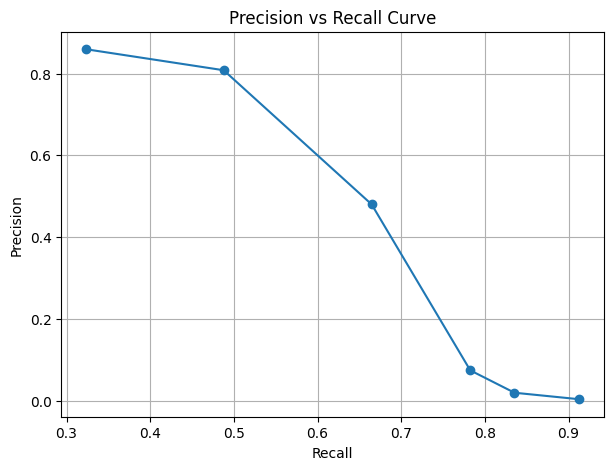

In [1]:
from gaussian_anomaly_detector import GaussianAnomalyDetector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
df = pd.read_csv(path + '/creditcard.csv')
df.head()

X = df.drop(columns=['Class'])
y = df['Class']

# 2. Create Model
model = GaussianAnomalyDetector(features=['V12', 'V18'])
print(model)

# 3. Train
model.fit(X, y)
print(model)

# 4. Score (auto-tune threshold)
f1 = model.score(X, y)
print(f"Best F1 score: {f1:.4f}")
print(f"Best log-epsilon: {model.best_log_epsilon_:.4f}")

# 5. Predict
y_pred = model.predict(X)
print("Predicted anomalies:", np.sum(y_pred))

# 6. Predict Probabilities
log_probs = model.predict_proba(X)
print(log_probs.head())

# 7. Save and Load
model.save('my_detector.pkl')
loaded_model = GaussianAnomalyDetector.load('my_detector.pkl')
print(loaded_model)

# 8. Plot Precision-Recall
model.plot_precision_recall(X, y)
